In [366]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drugdata = pd.read_csv(mouse_drug_data_to_load)
ctrial_drugdata = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
combined_data = pd.merge(mouse_drugdata,ctrial_drugdata,how="outer",on="Mouse ID")

# Display the data table for preview
#print(mouse_drugdata.head())

#print(ctrial_drugdata.head())

combined_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [308]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
gp_drug_time = combined_data.groupby(["Drug","Timepoint"])

# Convert to DataFrame
mean_tvol_df = gp_drug_time.agg({'Tumor Volume (mm3)': np.mean}).reset_index()
mean_tvol_df.columns.values[2] = "Average Tumor Vol (mm3)"

# Preview DataFrame
mean_tvol_df.head()

,Drug,Timepoint,Average Tumor Vol (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [42]:
#

In [318]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
sem_tvol_df = gp_drug_time.agg({'Tumor Volume (mm3)': sem}).reset_index()
sem_tvol_df.columns.values[2] = "Standard Error of Tumor Vol (mm3)"
# Preview DataFrame
sem_tvol_df.head()


,Drug,Timepoint,Standard Error of Tumor Vol (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [319]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
mean_tvol_df_ref = mean_tvol_df.set_index(['Timepoint','Drug']).unstack(level=-1)
sem_tvol_df_ref = sem_tvol_df.set_index(['Timepoint','Drug']).unstack(level=-1)


In [320]:
sem_tvol_df_ref.head()

Standard Error of Tumor Vol (mm3)                                \
Drug                              Capomulin  Ceftamin Infubinol  Ketapril   
Timepoint                                                                   
0                                  0.000000  0.000000  0.000000  0.000000   
5                                  0.448593  0.164505  0.235102  0.264819   
10                                 0.702684  0.236144  0.282346  0.357421   
15                                 0.838617  0.332053  0.357705  0.580268   
20                                 0.909731  0.359482  0.476210  0.726484   

                                                                       
Drug       Naftisol   Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                                              
0          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
5          0.202385  0.218091  0.231708  0.482955  0.239862  0.188950  
10         0.319415  0.402064  0.376195  0.720225  0.433678  0.263949  
15         0.444378  0.614461  0.466109  0.770432  0.493261  0.370544  
20         0.595260  0.839609  0.555181  0.786199  0.621889  0.533182

['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
---- ['Capomulin', 'Ceftamin', 'Infubinol'] ----


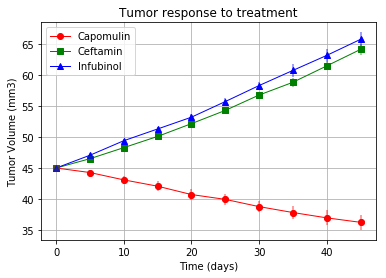

In [362]:
# Generate the Plot (with Error Bars)
list_of_drugs = [name[1] for name in list(sem_tvol_df_ref.keys())]
print(list_of_drugs)

list_of_drugs_plot = [list_of_drugs[i] for i in range(3)]
#list_of_drugs_plot = [random.choice(list_of_drugs) for i in range(3)]
print(f"---- {list_of_drugs_plot} ----")


fig, ax = plt.subplots()

markers =["o","s","^"]
colors = ["r","g","b"]

legend_list = []

for index,drug_name in enumerate(list_of_drugs_plot):
    
    drug_size = mean_tvol_df_ref['Average Tumor Vol (mm3)'][drug_name]
    drug_sem = sem_tvol_df_ref['Standard Error of Tumor Vol (mm3)'][drug_name]
    #xlimt = max(list(drug_size.keys()))
    
    ax.errorbar(x_axis, drug_size, yerr=drug_sem, fmt=markers[index], color=colors[index], alpha=0.5)
    
    leg, = ax.plot(x_axis, drug_size, linewidth=1, marker=markers[index], color=colors[index])
    legend_list.append(leg)

    #ax.set_xlim(0, xlimt)

# Save the Figure
plt.title("Tumor response to treatment")
plt.grid()
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(handles = legend_list)

#fig.savefig('TumorVol_time.png')
# Show the Figure
plt.show()


## Metastatic Response to Treatment

In [317]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame
mean_met_df = gp_drug_time.agg({'Metastatic Sites': np.mean}).reset_index()
mean_met_df.columns.values[2] = "Metastatic Sites"

# Preview DataFrame
mean_met_df.head()
# Preview DataFrame


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [325]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame
sem_met_df = gp_drug_time.agg({'Metastatic Sites': sem}).reset_index()
sem_met_df.columns.values[2] = "Standard Error of Metastatic"
# Preview DataFrame
sem_met_df.head()

,Drug,Timepoint,Standard Error of Metastatic
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [363]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_df_ref = mean_met_df.set_index(['Timepoint','Drug']).unstack(level=-1)
sem_met_df_ref = sem_met_df.set_index(['Timepoint','Drug']).unstack(level=-1)
# Preview that Reformatting worked
sem_met_df_ref.head()
#sem_met_df_ref.keys()


Standard Error of Metastatic                                \
Drug                         Capomulin  Ceftamin Infubinol  Ketapril   
Timepoint                                                              
0                             0.000000  0.000000  0.000000  0.000000   
5                             0.074833  0.108588  0.091652  0.098100   
10                            0.125433  0.152177  0.159364  0.142018   
15                            0.132048  0.180625  0.194015  0.191381   
20                            0.161621  0.241034  0.234801  0.236680   

                                                                       
Drug       Naftisol   Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                                              
0          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
5          0.093618  0.100947  0.095219  0.066332  0.087178  0.077709  
10         0.163577  0.115261  0.105690  0.090289  0.123672  0.109109  
15         0.158651  0.190221  0.136377  0.115261  0.153439  0.111677  
20         0.181731  0.234064  0.171499  0.119430  0.200905  0.166378

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
---- ['Capomulin', 'Ceftamin', 'Infubinol'] ----


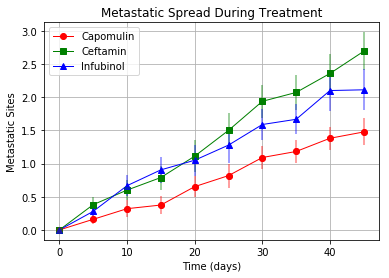

In [361]:
# Generate the Plot (with Error Bars)
#list_of_drugs = [name[1] for name in list(sem_met_df_ref.keys())]
print(list_of_drugs)

#list_of_drugs_plot = [list_of_drugs[i] for i in range(3)]
#list_of_drugs_plot = [random.choice(list_of_drugs) for i in range(3)]
print(f"---- {list_of_drugs_plot} ----")


fig, ax = plt.subplots()

markers =["o","s","^"]
colors = ["r","g","b"]

legend_list = []
for index, drug_name in enumerate(list_of_drugs_plot):
    
    met_sites = mean_met_df_ref['Metastatic Sites'][drug_name]
    met_sem = sem_met_df_ref['Standard Error of Metastatic'][drug_name]
    #xlimt = max(list(drug_size.keys()))
    
    ax.errorbar(x_axis, met_sites, yerr=met_sem, fmt=markers[index], color=colors[index], alpha=0.5)
    
    leg, = ax.plot(x_axis, met_sites, linewidth=1, marker=markers[index], color=colors[index])
    legend_list.append(leg)

    #ax.set_xlim(0, xlimt)
    


plt.title("Metastatic Spread During Treatment")
plt.grid()
plt.xlabel("Time (days)")
plt.ylabel("Metastatic Sites")
plt.legend(handles = legend_list)

# Save the Figure
#fig.savefig('MetaSites_time.png')

# Show the Figure
plt.show()

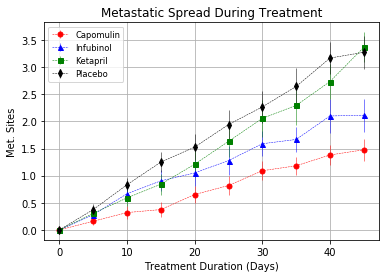

## Survival Rates

In [346]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame
mouse_count_df = gp_drug_time.count().drop(['Tumor Volume (mm3)', 'Metastatic Sites'], axis=1).reset_index()

# Preview DataFrame
mouse_count_df.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [347]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_df_ref = mouse_count_df.set_index(['Timepoint','Drug']).unstack(level=-1)

# Preview the Data Frame
mouse_count_df_ref.head()


Mouse ID                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17

In [355]:
max(mouse_count_df_ref['Mouse ID']['Capomulin'])

25

['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
---- ['Capomulin', 'Ceftamin', 'Infubinol'] ----


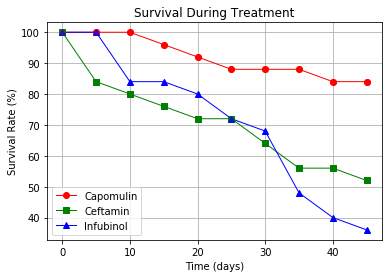

In [360]:
# Generate the Plot (Accounting for percentages)

#list_of_drugs = [name[1] for name in list(sem_met_df_ref.keys())]
print(list_of_drugs)

#list_of_drugs_plot = [list_of_drugs[i] for i in range(3)]

#list_of_drugs_plot = [random.choice(list_of_drugs) for i in range(3)]
print(f"---- {list_of_drugs_plot} ----")


#mouse_count = [mouse_count_df_ref['Mouse ID'][name] for name in list_of_drugs_plot]
#list_drug_sem = [sem_met_df_ref['Standard Error of Metastatic'][name] for name in list_of_drugs_plot]

fig, ax = plt.subplots()

markers =["o","s","^"]
colors = ["r","g","b"]

legend_list = []

for index, drug_name in enumerate(list_of_drugs_plot):
    
    mouse_count = mouse_count_df_ref['Mouse ID'][drug_name]
    percentage = mouse_count/max(mouse_count)*100
    #met_sem = sem_met_df_ref['Standard Error of Metastatic'][drug_name]
    #xlimt = max(list(drug_size.keys()))
    
    ax.errorbar(x_axis, percentage, fmt=markers[index], color=colors[index], alpha=0.5)
    
    leg, = ax.plot(x_axis, percentage, linewidth=1, marker=markers[index], color=colors[index])
    legend_list.append(leg)

    #ax.set_xlim(0, xlimt)

    




plt.title("Survival During Treatment")
plt.grid()
plt.xlabel("Time (days)")
plt.ylabel("Survival Rate (%)")
plt.legend(handles = legend_list)

# Save the Figure
#fig.savefig('SurvRate_time.png')

# Show the Figure
plt.show()


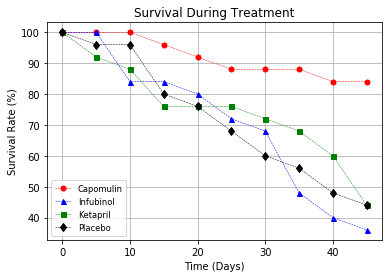

## Summary Bar Graph

In [524]:
# Calculate the percent changes for each drug

# Display the data to confirm
Mean_Tumor_Volume = gp_drug_time["Tumor Volume (mm3)"].mean()
aaa = list(Mean_Tumor_Volume.keys())
#aaa

print(list_of_drugs)
#aaa

records = [pd.Series(Mean_Tumor_Volume[name]).reset_index()["Tumor Volume (mm3)"] for name in list_of_drugs]
#list_of_drugs
changes = [(record.iloc[-1]-record.iloc[0])/record.iloc[0]*100 for record in records]

changes_df = pd.DataFrame({"Drugs": list_of_drugs,"%Changes":changes})
changes_df 

['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']


,Drugs,%Changes
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


In [577]:
changes

[-19.475302667894173,
 42.51649185589744,
 46.12347172785187,
 57.028794686606076,
 53.92334713476923,
 51.29796048315153,
 47.24117486320637,
 -22.320900462766673,
 52.085134287899024,
 46.57975086509525]

['g', 'r', 'r', 'r', 'r', 'r', 'r', 'g', 'r', 'r']


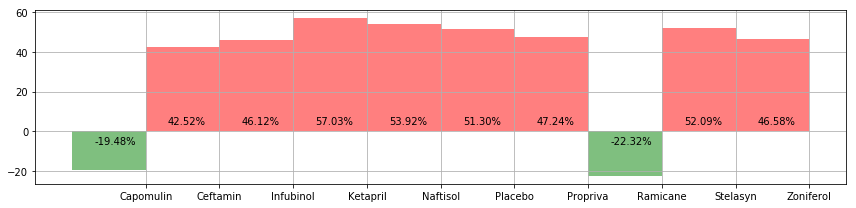

In [608]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs

colors = ['r' if change>0 else 'g' for change in changes]
print(colors)

# Orient widths. Add labels, tick marks, etc. 

width = 1
# Use functions to label the percentages of changes
# Call functions to implement the function calls

plt.figure(figsize=(12,3))

x_axis = changes_df.index
tick_locations = [value for value in x_axis]

plt.bar(x_axis, changes_df["%Changes"],width=-1, color=colors, alpha=0.5, align="edge")
plt.xticks(tick_locations, changes_df["Drugs"], rotation=0)

for index,value in enumerate(changes):
    plt.text(s="{:.2f}%".format(value), x=index-0.7, y=-1.5+np.sign(value)*5, color="k")

# Save the Figure

plt.tight_layout()

plt.grid()
# Show the Figure
plt.show()